<a href="https://colab.research.google.com/github/norsaytrad/repo1/blob/main/ACF_PACF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ice Cream Poduction Example**

##**ACF**

In [1]:
!python --version

Python 3.7.13


In [2]:
import sys
sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#data
df_ice_cream = pd.read_csv("https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv", header = 0, parse_dates = True, index_col = 0)

In [5]:
df_ice_cream.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [6]:
df_ice_cream.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577 entries, 1972-01-01 to 2020-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  577 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


In [7]:
#rename column
df_ice_cream.columns = ["production"]
df_ice_cream.head(2)

,production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605


In [8]:
#subset data
start_date = "2010-01-01"
df_ice_cream = df_ice_cream.loc[start_date:]
df_ice_cream.head()

,production
DATE,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


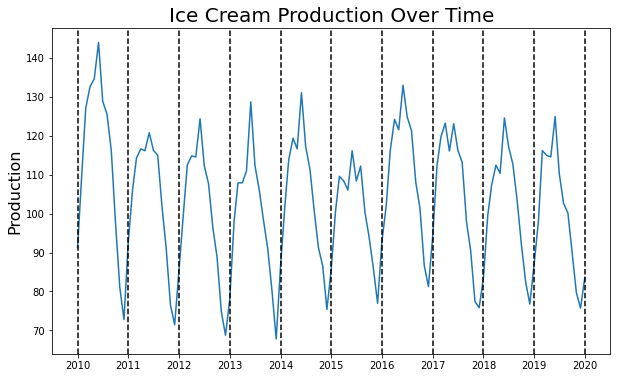

In [9]:
#plot data
plt.figure(figsize=(10,6))
plt.plot(df_ice_cream)
plt.title("Ice Cream Production Over Time", fontsize=20)
plt.ylabel("Production", fontsize=16)
for year in range(2010, 2021):
  plt.axvline(f'{year}-01-01', color='k', linestyle= '--')

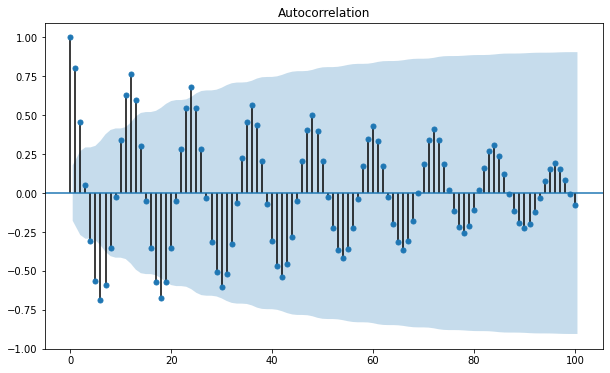

In [10]:
plt.rc("figure", figsize=(10,6))
acf_plot = plot_acf(df_ice_cream.production, lags=100)

**Based on decaying ACF, we are likely dealing with an Auto Regressive Process**

## **PACF**

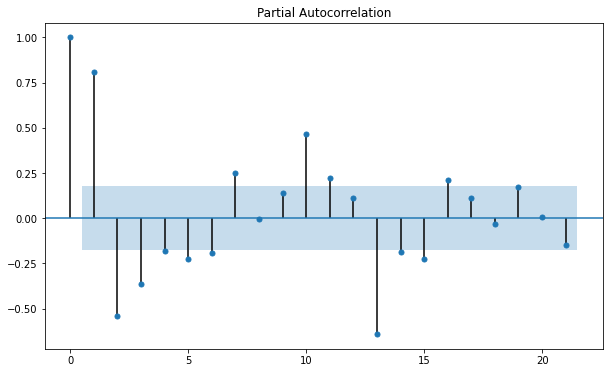

In [11]:
pacf_plot = plot_pacf(df_ice_cream.production)

**Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3 10, 13**

# **Stock Data Example**

## **Data**

In [49]:
%pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [12]:
import yfinance as yf

In [20]:
#ticker symbol
symbol = 'SPY'

In [21]:
#Ticker Object
ticker = yf.Ticker(symbol)

In [22]:
#get stock info
ticker.info

{'52WeekChange': None,
 'SandP52WeekChange': None,
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 394.72,
 'askSize': 1000,
 'averageDailyVolume10Day': 72407250,
 'averageVolume': 98179654,
 'averageVolume10days': 72407250,
 'beta': None,
 'beta3Year': 1,
 'bid': 394.56,
 'bidSize': 1000,
 'bondHoldings': {'creditQuality': None,
  'creditQualityCat': None,
  'duration': None,
  'durationCat': None,
  'maturity': None,
  'maturityCat': None},
 'bondPosition': 0,
 'bondRatings': [{'bb': 0},
  {'aa': 0},
  {'aaa': 0},
  {'a': 0},
  {'other': 0},
  {'b': 0},
  {'bbb': 0},
  {'below_b': 0},
  {'us_government': 0}],
 'bookValue': None,
 'cashPosition': None,
 'category': 'Large Blend',
 'circulatingSupply': None,
 'coinMarketCapLink': None,
 'companyOfficers': [],
 'convertiblePosition': None,
 'currency': 'USD',
 'dayHigh': 400.18,
 'dayLow': 392.76,
 'dividendRate': None,
 'dividendYield': None,
 'earningsQuarterlyGrowth': None,
 'enterprise

In [23]:
#get historical data
raw = ticker.history(period='1d', start='2014-1-1', end='2022-7-22')

In [26]:
df = raw[['Close']]

In [27]:
df.head()

,Close
Date,
2014-01-02,156.340866
2014-01-03,156.315170
2014-01-06,155.862244
2014-01-07,156.819473
2014-01-08,156.853653


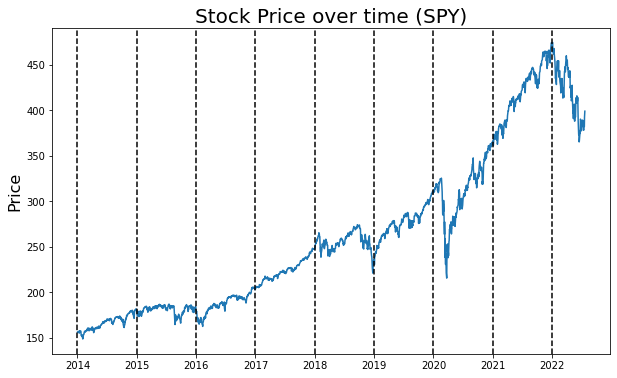

In [30]:
#plot data
plt.plot(df.Close)
plt.title("Stock Price over time (%s)"%symbol, fontsize=20)
plt.ylabel("Price", fontsize=16)
for year in range(2014, 2023):
  plt.axvline(f'{year}-01-01', color = 'k', linestyle= '--');

**This data is NOT stationary**

## **Stationarity**

In [39]:
#take first difference
first_diff = df.Close.values[1:] - df.Close.values[:-1]     #np.array
#first_diff_1 = df.Close - df.Close.shift(1)     #pandas.series --keeping index

In [40]:
first_diffs = np.concatenate([first_diff, [0]]) #same size as dataframe to merge it

In [41]:
first_diffs

array([-0.0256958 , -0.45292664,  0.95722961, ...,  2.5       ,
        4.02001953,  0.        ])

In [42]:
#add first difference as a variable in dataframe
df['FirstDifference'] = first_diffs
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Close,FirstDifference
Date,,
2014-01-02,156.340866,-0.025696
2014-01-03,156.315170,-0.452927
2014-01-06,155.862244,0.957230
2014-01-07,156.819473,0.034180
2014-01-08,156.853653,0.102539


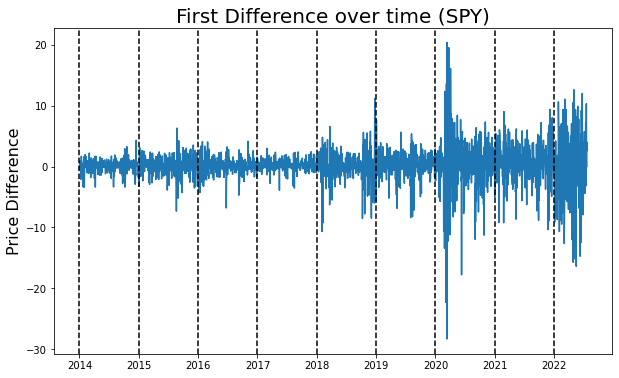

In [43]:
#plot new data; FirstDifference
plt.plot(df.FirstDifference)
plt.title("First Difference over time (%s)"%symbol, fontsize=20)
plt.ylabel("Price Difference", fontsize=16)
for year in range(2014, 2023):
  plt.axvline(f'{year}-01-01', color = 'k', linestyle= '--');

**Better graph, but still Variable Volatility and some signs of seasonality**

## **ACF**

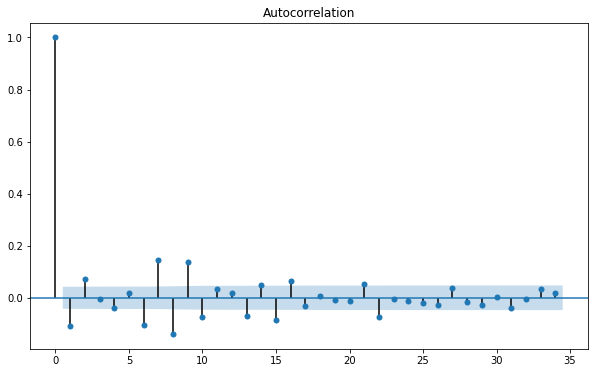

In [46]:
acf_plot = plot_acf(df.FirstDifference)

## **PACF**

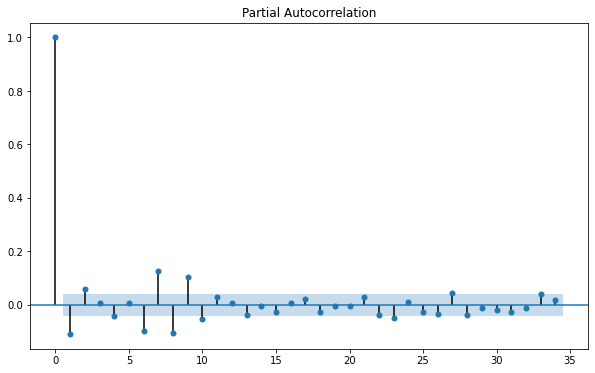

In [47]:
pacf_plot = plot_pacf(df.FirstDifference)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')